In [3]:
import re
import pandas as pd

# Read the text file
with open('gNB-B210.log', 'r') as file:
    data = file.read()

# Define the regex pattern to extract the required information
pattern = r'Frame\.Slot (\d+)\..*?UE RNTI (\w+).*?PCMAX (\d+).*?average RSRP (-?\d+).*?dlsch_rounds (\d+/\d+/\d+/\d+).*?dlsch_errors (\d+).*?pucch0_DTX (\d+).*?BLER ([0-9.]+).*?MCS (\d+).*?dlsch_total_bytes (\d+).*?ulsch_rounds (\d+/\d+/\d+/\d+).*?ulsch_DTX (\d+).*?ulsch_errors (\d+).*?BLER ([0-9.]+).*?MCS (\d+).*?ulsch_total_bytes_scheduled (\d+).*?ulsch_total_bytes_received (\d+).*?LCID 1: (\d+).*?LCID 4: (\d+).*?LCID 4: (\d+)'

# Find all matches in the text
matches = re.findall(pattern, data, re.DOTALL)

# Create a dataframe from the matches
df = pd.DataFrame(matches, columns=['Frame.Slot', 'UE RNTI', 'PCMAX', 'average RSRP', 'dlsch_rounds', 'dlsch_errors', 'pucch0_DTX', 'BLER', 'MCS', 'dlsch_total_bytes', 'ulsch_rounds', 'ulsch_DTX', 'ulsch_errors', 'BLER', 'MCS', 'ulsch_total_bytes_scheduled', 'ulsch_total_bytes_received', 'LCID 1', 'LCID 4', 'LCID 4'])

# Display the dataframe
df

,Frame.Slot,UE RNTI,PCMAX,average RSRP,dlsch_rounds,dlsch_errors,pucch0_DTX,BLER,MCS,dlsch_total_bytes,ulsch_rounds,ulsch_DTX,ulsch_errors,BLER,MCS,ulsch_total_bytes_scheduled,ulsch_total_bytes_received,LCID 1,LCID 4,LCID 4
0,384,5f13,21,-100,42/1/1/0,0,2,0.06735,9,8182,299/0/0/0,0,0,0.03874,9,44231,43702,677,1240,1718
1,640,5ed8,21,0,7/0/0/0,0,0,0.10000,9,738,24/0/0/0,0,0,0.10000,9,2048,1816,109,3878,4681
2,0,5ed8,21,-98,179/1/0/0,0,1,0.06623,9,181095,835/0/0/0,0,0,0.00646,7,128611,128281,701,158741,18486
3,128,5ed8,21,-100,245/3/1/1,1,6,0.03202,9,209092,1247/2/1/1,2,1,0.00486,9,176563,176113,704,175315,26050
4,256,5ed8,21,-101,349/3/1/1,1,6,0.00904,11,357068,1668/2/1/1,2,1,0.00137,9,271154,270704,707,311523,65682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490,0,5ed8,21,-103,164193/1549/33/3,2,134,0.00055,25,224508515,611008/545/28/13,36,5,0.00264,9,96702985,96702220,6302,172608031,13148991
1491,128,5ed8,21,-102,164304/1550/33/3,2,134,0.00171,24,224644806,611411/545/28/13,36,5,0.00075,9,96770711,96769946,6305,172711379,13158379
1492,256,5ed8,21,-108,164399/1551/33/3,2,134,0.00290,22,224735457,611807/545/28/13,36,5,0.00019,9,96837119,96836354,6311,172773110,13167214
1493,384,5ed8,21,-94,164528/1552/33/3,2,134,0.00330,24,224897988,612211/545/28/13,36,5,0.00005,9,96902901,96902090,6314,172897947,13175476


In [4]:
 #Save the dataframe as a CSV file
df.to_csv('output.csv', index=False)

In [19]:
import csv
import pandas as pd 

df = pd.DataFrame(columns=['Throughput', 'UL Packet Loss', 'DL Packet Loss'])

with open('output.csv') as f:
    reader = csv.reader(f)
    headers = next(reader)
    
    for row in reader:
        ulsch_rounds = int(row[10].split('/')[0])
        ulsch_errors = int(row[12])
        ulsch_bytes = int(row[15])

        dlsch_rounds = int(row[4].split('/')[0])        
        dlsch_errors = int(row[5])
        dlsch_bytes = int(row[9])

        time_period = 128
        total_bytes = ulsch_bytes + dlsch_bytes
        throughput = total_bytes / time_period / 1000

        ul_loss = ulsch_errors / ulsch_rounds  
        dl_loss = dlsch_errors / dlsch_rounds

        new_row = {'Throughput': throughput,
                   'UL Packet Loss': ul_loss,  
                   'DL Packet Loss': dl_loss}
                   
        df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)
        
print(df)

       Throughput  UL Packet Loss  DL Packet Loss
0        0.409477        0.000000        0.000000
1        0.021766        0.000000        0.000000
2        2.419578        0.000000        0.000000
3        3.012930        0.000802        0.004082
4        4.907984        0.000600        0.002865
...           ...             ...             ...
1490  2509.464844        0.000008        0.000012
1491  2511.058727        0.000008        0.000012
1492  2512.285750        0.000008        0.000012
1493  2514.069445        0.000008        0.000012
1494  2515.605859        0.000008        0.000012

[1495 rows x 3 columns]


In [21]:
#Save the dataframe as a CSV file
df.to_csv('output3.csv', index=False)

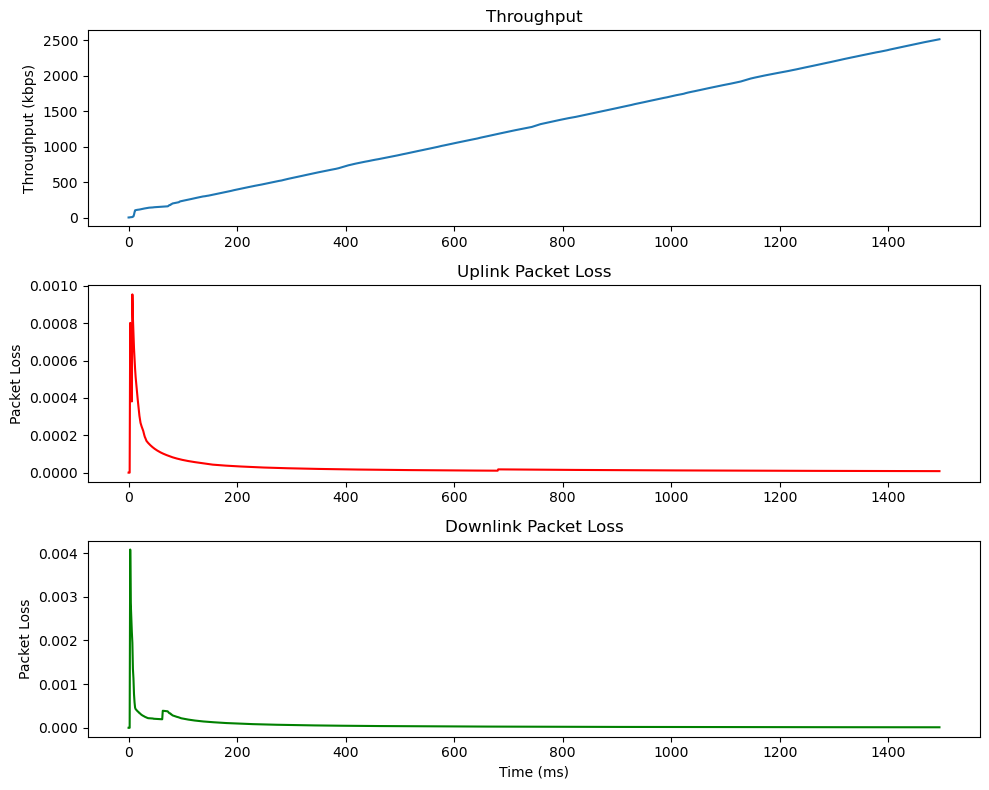

In [20]:
import matplotlib.pyplot as plt

# DataFrame df from previous code

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 8))

# Throughput plot
ax1.plot(df['Throughput'])
ax1.set_title("Throughput")
ax1.set_ylabel("Throughput (kbps)")

# Uplink Packet Loss plot
ax2.plot(df['UL Packet Loss'], color='red') 
ax2.set_title("Uplink Packet Loss")
ax2.set_ylabel("Packet Loss")

# Downlink Packet Loss plot  
ax3.plot(df['DL Packet Loss'], color='green')
ax3.set_title("Downlink Packet Loss")
ax3.set_ylabel("Packet Loss")
ax3.set_xlabel("Time (ms)")

plt.tight_layout()
plt.show()